In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

/Users/trans/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import kagglehub
import pandas as pd
df = pd.read_csv("depression_data.csv")

In [7]:
df

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


In [8]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [9]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [11]:
df.isna().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

# Marital Status

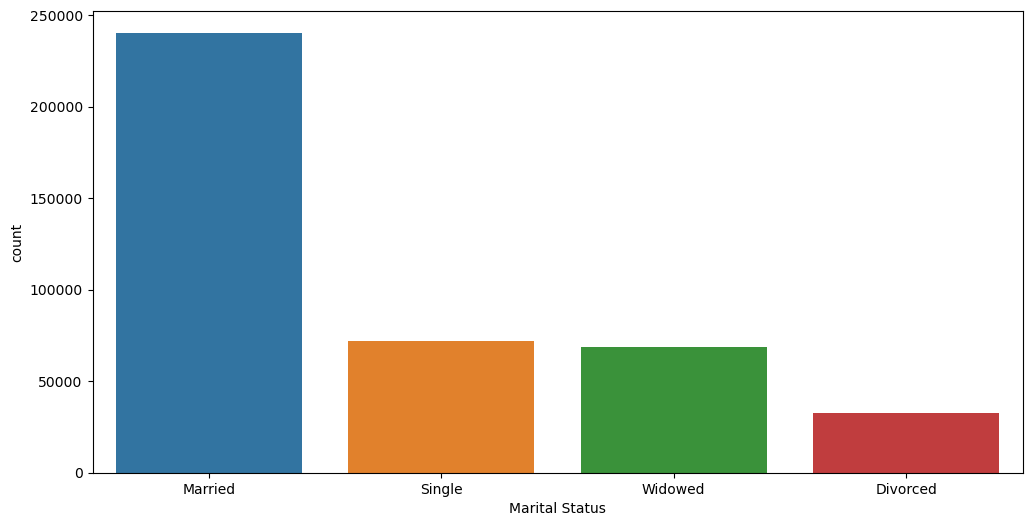

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Marital Status', data=df, order=df['Marital Status'].value_counts().index)
plt.show()

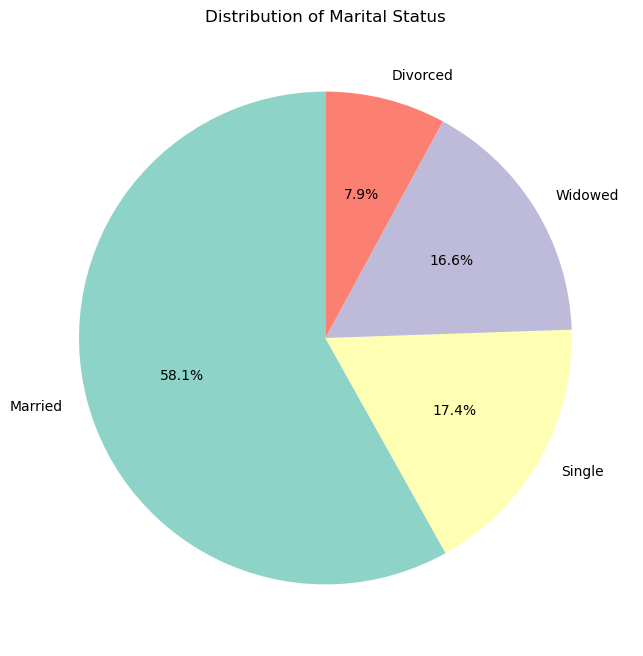

In [34]:
marital_counts = df['Marital Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Marital Status')
plt.show()

# Age

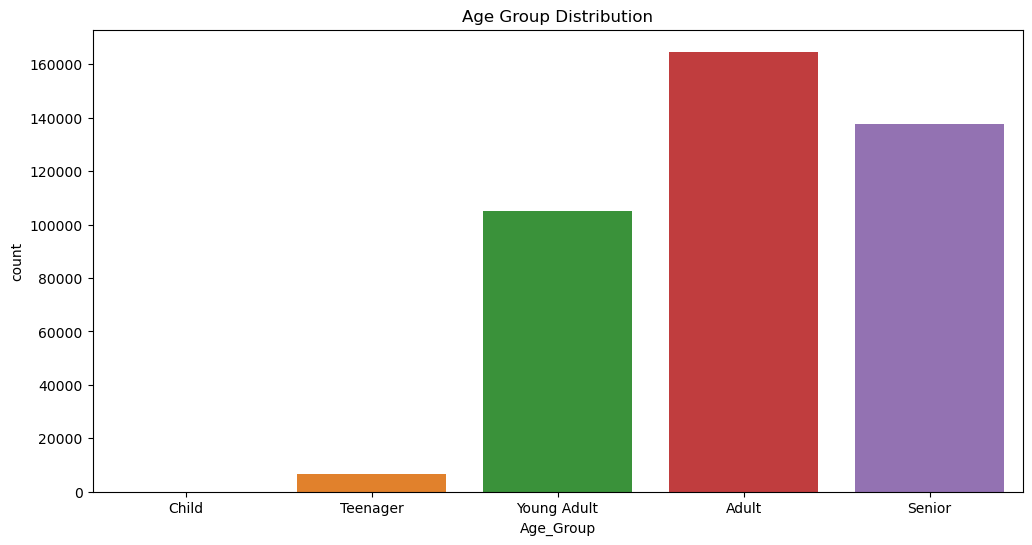

In [15]:
bins = [0, 12, 19, 35, 60, 100] 
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6)) 
sns.countplot(x='Age_Group', data=df) 
plt.title('Age Group Distribution') 
plt.show()

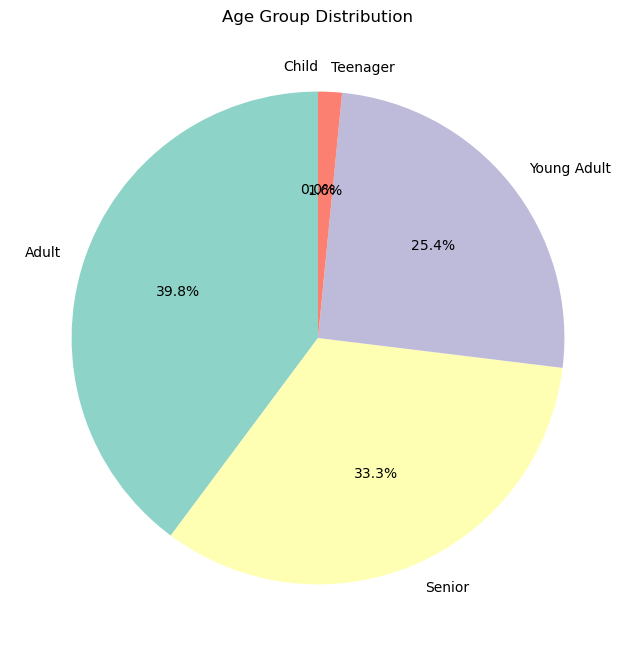

In [35]:
age_group_counts = df['Age_Group'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(age_group_counts)))
plt.title('Age Group Distribution')
plt.show()


# Education Level

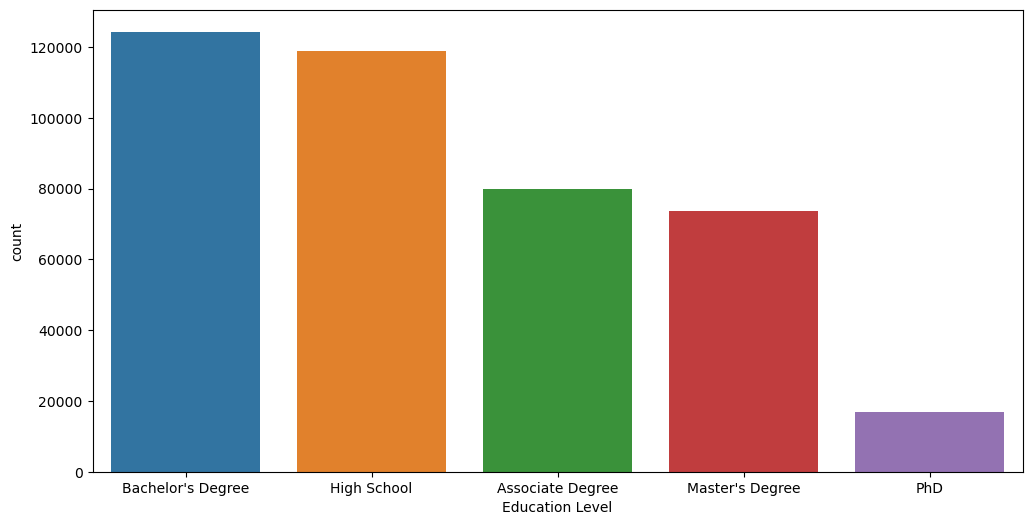

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Education Level', data=df, order=df['Education Level'].value_counts().index)
plt.show()

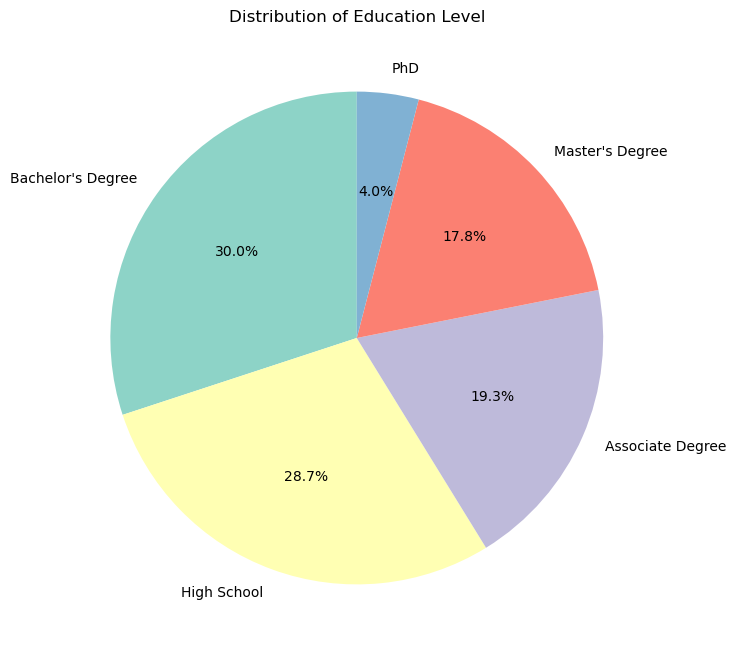

In [36]:
marital_counts = df['Education Level'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Education Level')
plt.show()

# Number of Children

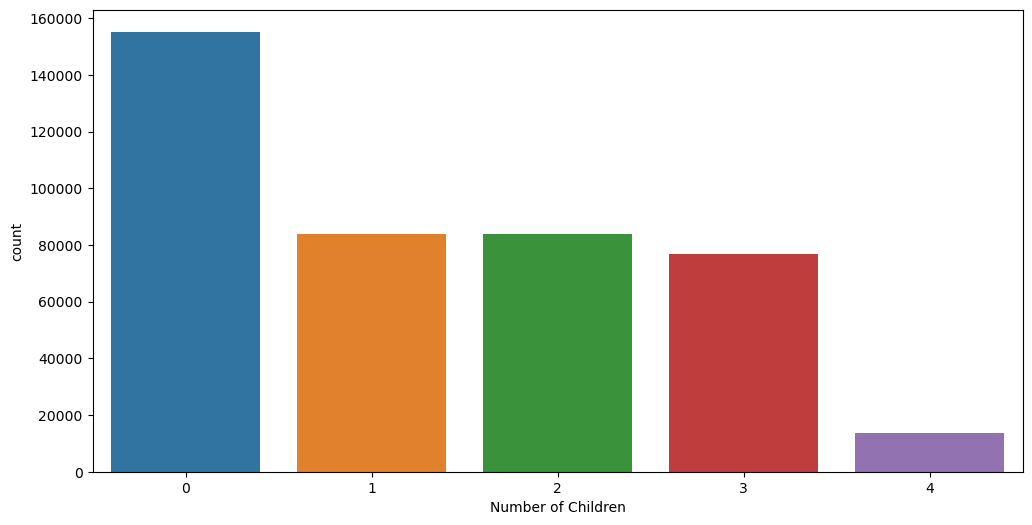

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Number of Children', data=df)
plt.show()

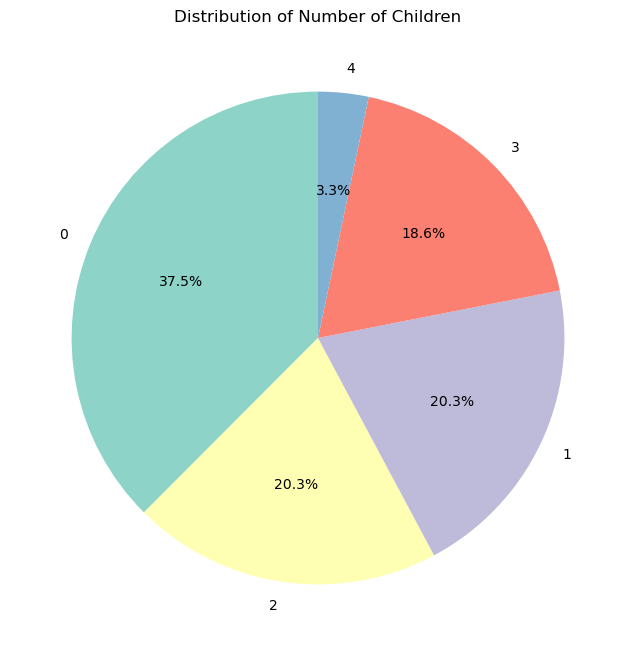

In [37]:
marital_counts = df['Number of Children'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Number of Children')
plt.show()

# Smokers

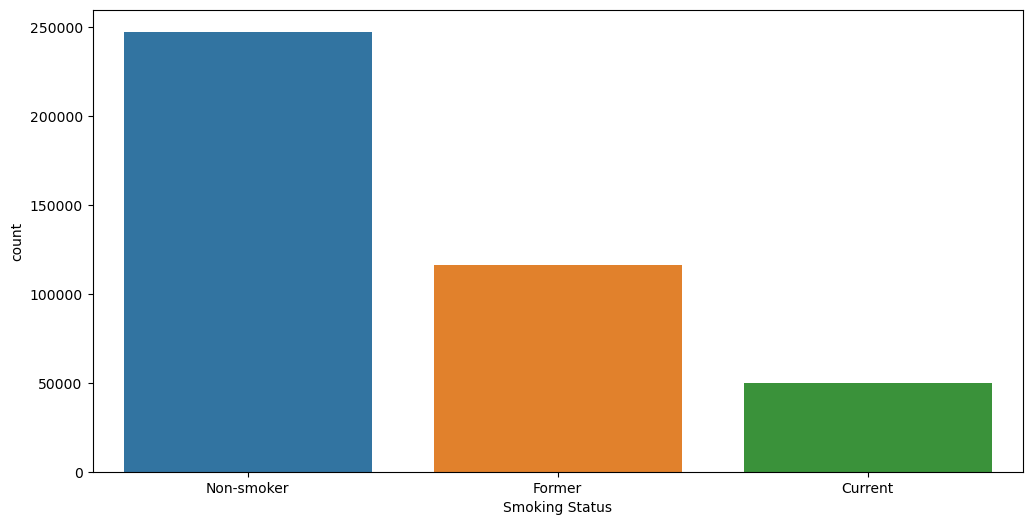

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Smoking Status', data=df, order=df['Smoking Status'].value_counts().index)
plt.show()

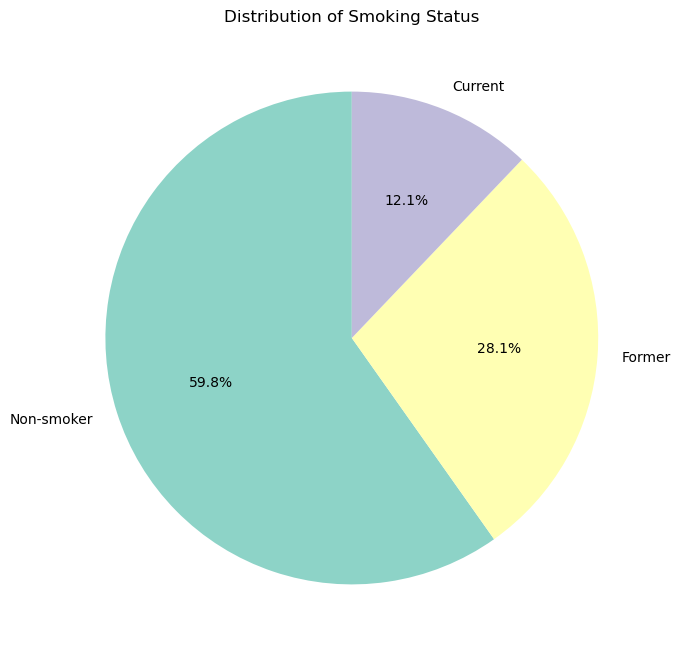

In [38]:
marital_counts = df['Smoking Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Smoking Status')
plt.show()

# Physical Activity Level

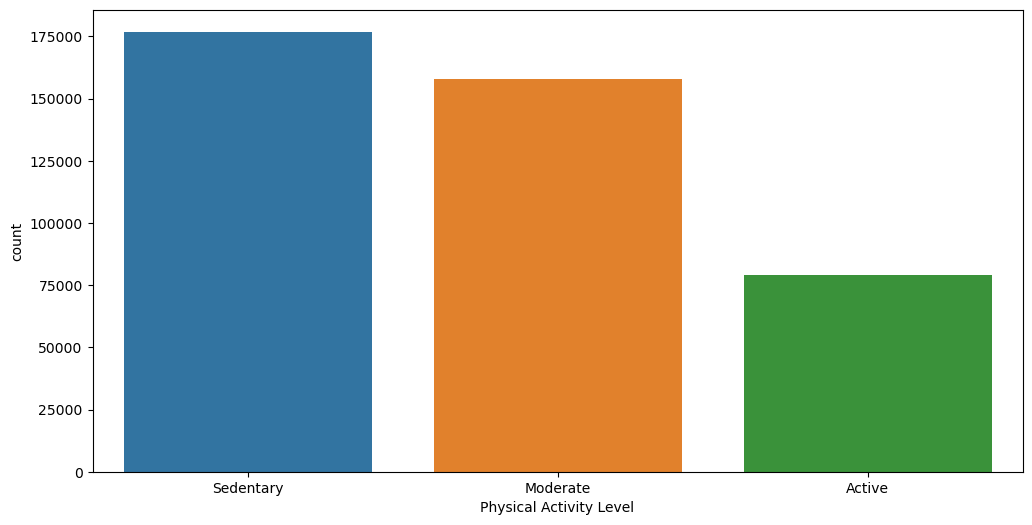

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Physical Activity Level', data=df, order=df['Physical Activity Level'].value_counts().index)
plt.show()

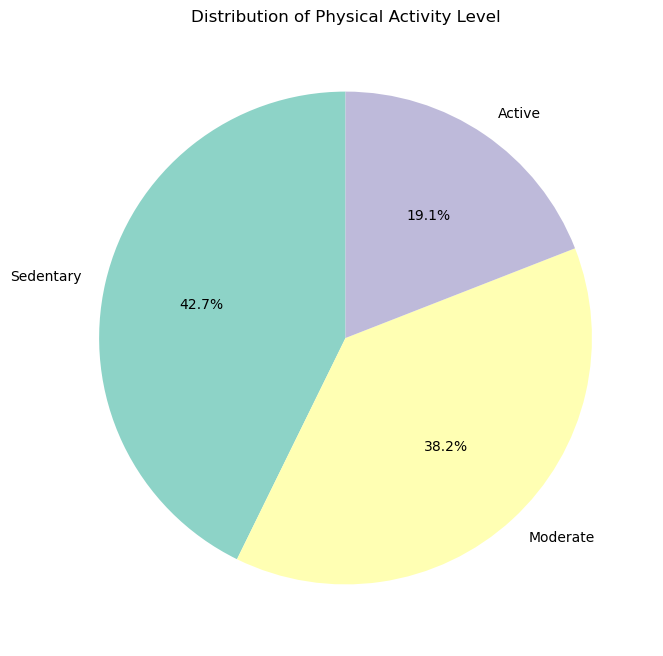

In [40]:
marital_counts = df['Physical Activity Level'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Physical Activity Level')
plt.show()

# Employment Status

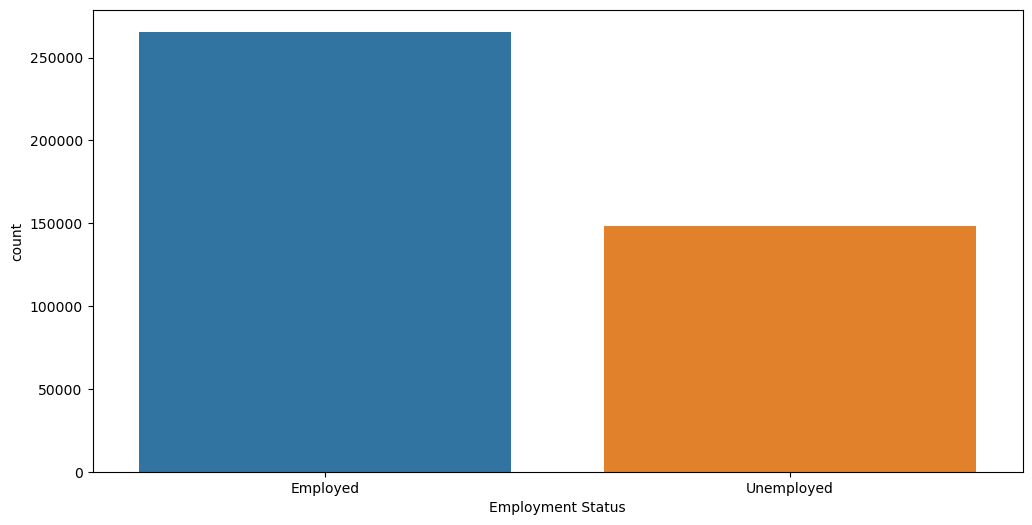

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Employment Status', data=df, order=df['Employment Status'].value_counts().index)
plt.show()


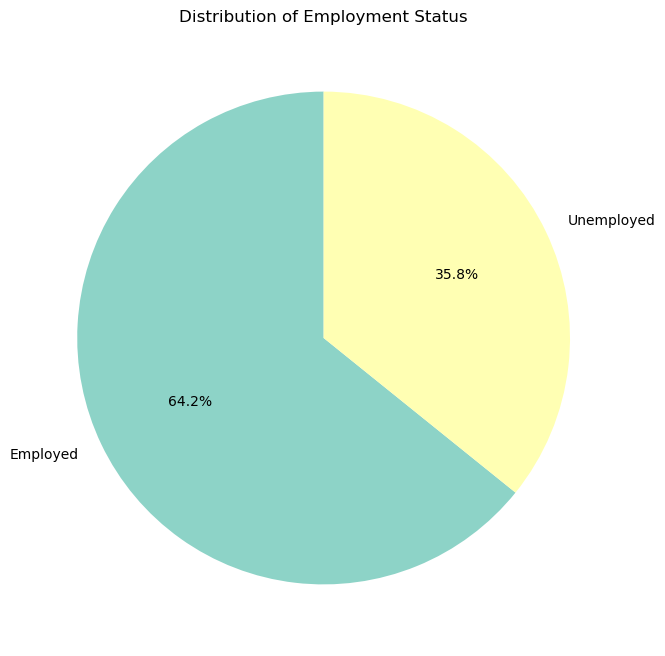

In [41]:
marital_counts = df['Employment Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Employment Status')
plt.show()

# Income

In [23]:
income_summary = pd.DataFrame(df.groupby('Age_Group')['Income'].sum()).reset_index()

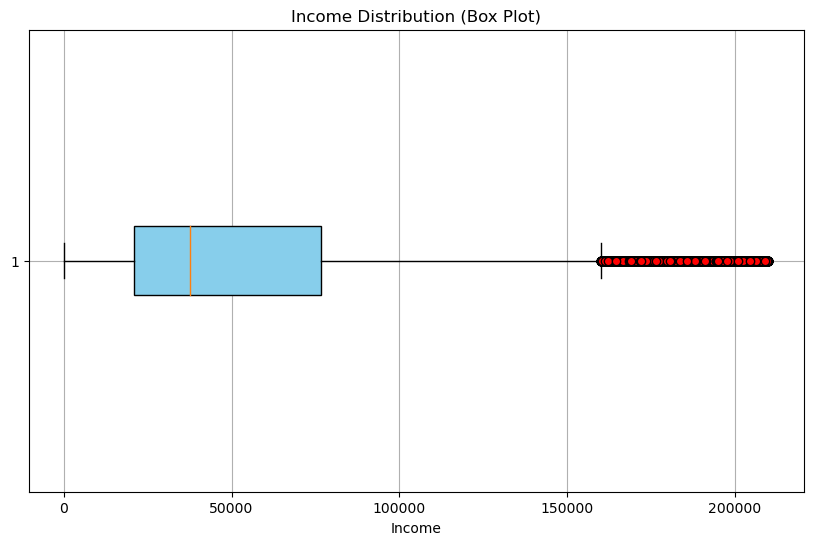

In [60]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'income' is the column containing income data
plt.figure(figsize=(10, 6))
plt.boxplot(df['Income'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'), 
            flierprops=dict(markerfacecolor='red', marker='o', markersize=6))
plt.title('Income Distribution (Box Plot)')
plt.xlabel('Income')
plt.grid(True)
plt.show()


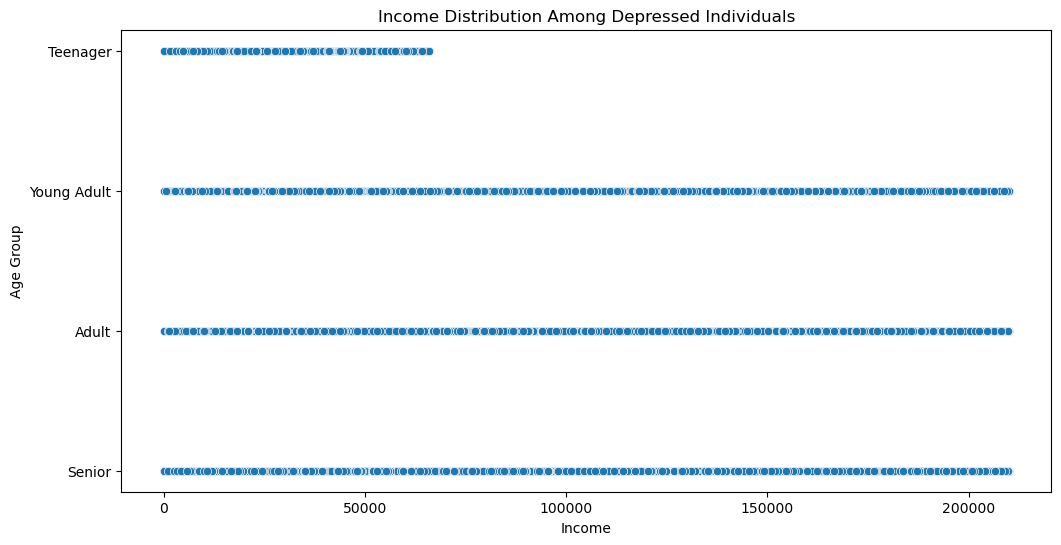

In [24]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x='Income', y='Age_Group', data=df) 
plt.title('Income Distribution Among Depressed Individuals') 
plt.xlabel('Income') 
plt.ylabel('Age Group')
plt.show()

# Alcohol Consumption

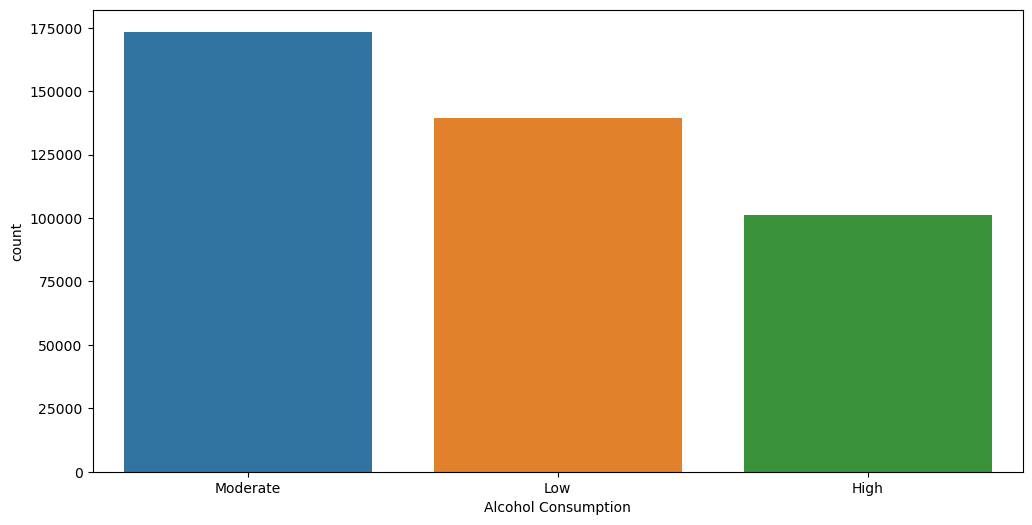

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Alcohol Consumption', data=df, order=df['Alcohol Consumption'].value_counts().index)
plt.show()

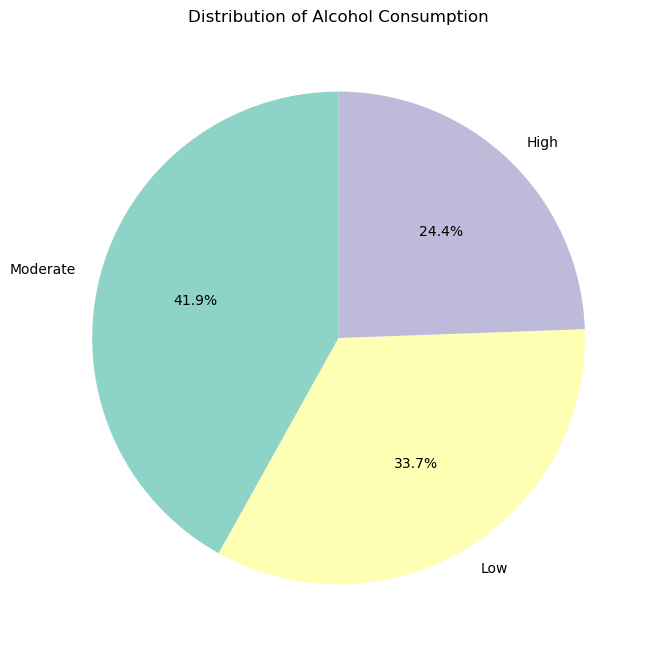

In [42]:
marital_counts = df['Alcohol Consumption'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Alcohol Consumption')
plt.show()

# Dietary Habits

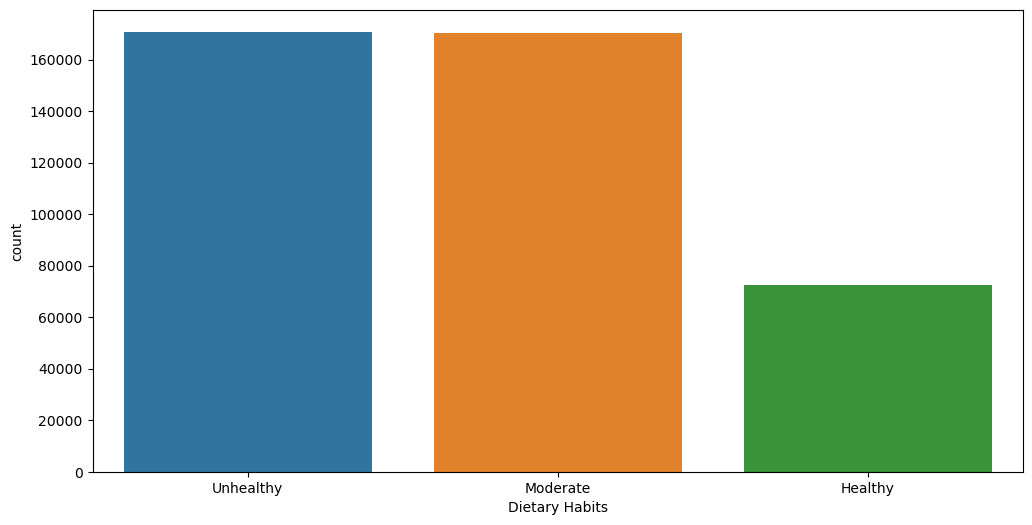

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Dietary Habits', data=df, order=df['Dietary Habits'].value_counts().index)
plt.show()

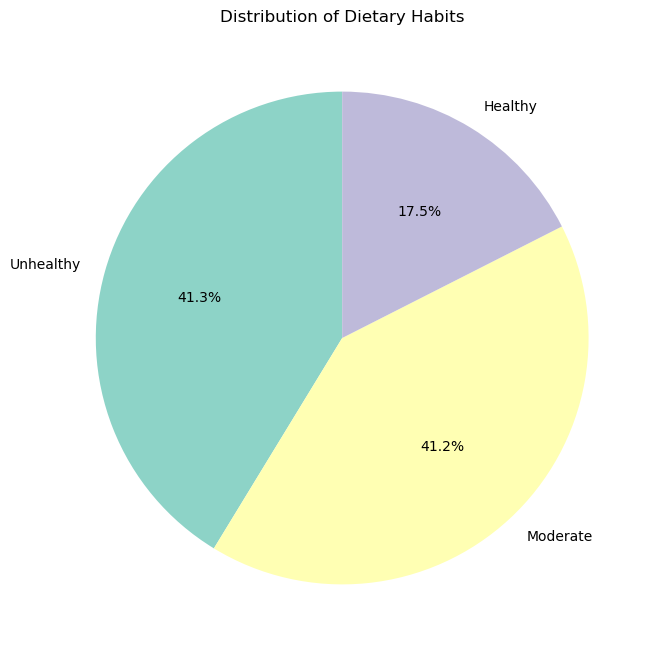

In [43]:
marital_counts = df['Dietary Habits'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Dietary Habits')
plt.show()

# Sleep Patterns

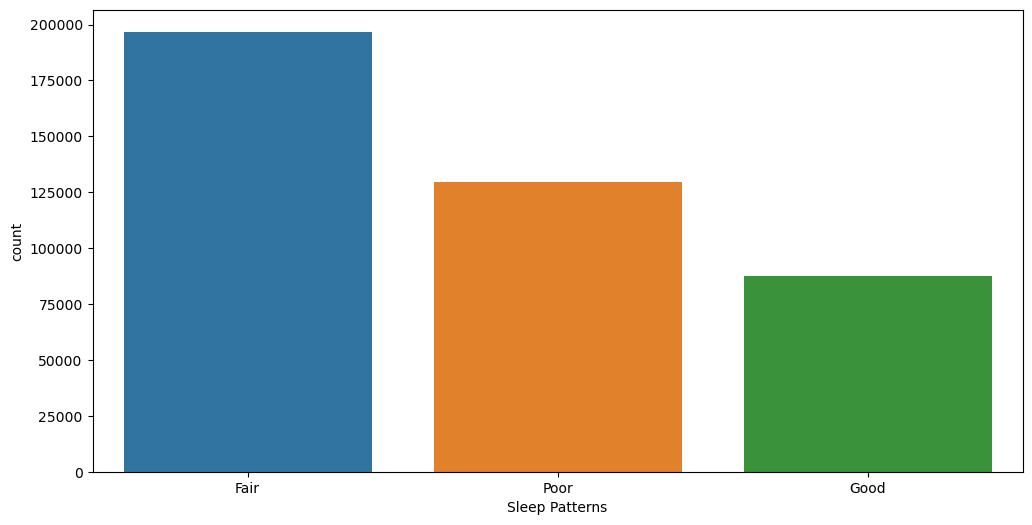

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sleep Patterns', data=df, order=df['Sleep Patterns'].value_counts().index)
plt.show()

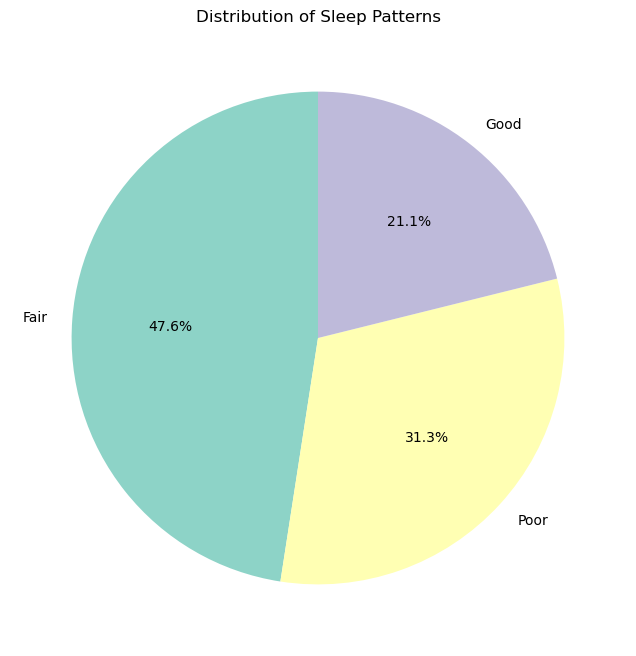

In [44]:
marital_counts = df['Sleep Patterns'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Sleep Patterns')
plt.show()

# Mental Illness

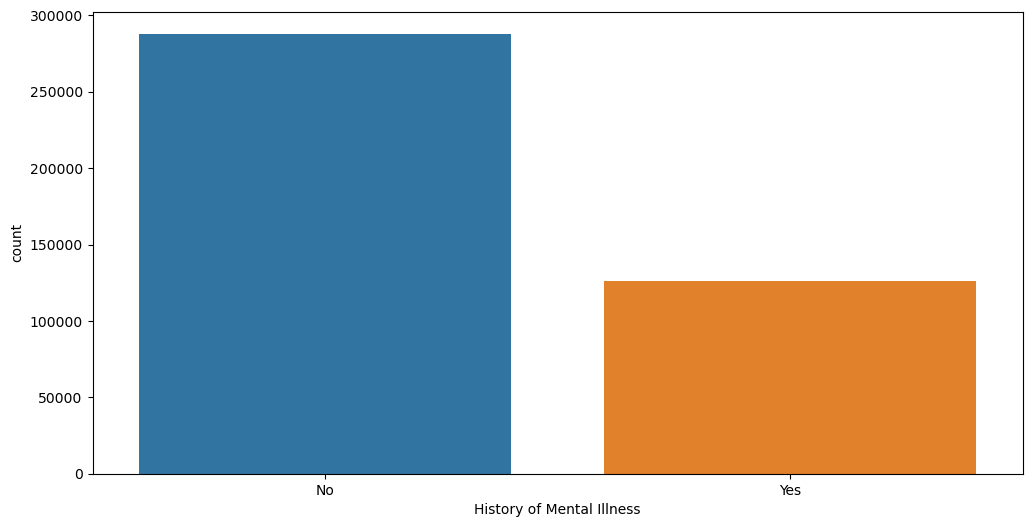

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='History of Mental Illness', data=df, order=df['History of Mental Illness'].value_counts().index)
plt.show()

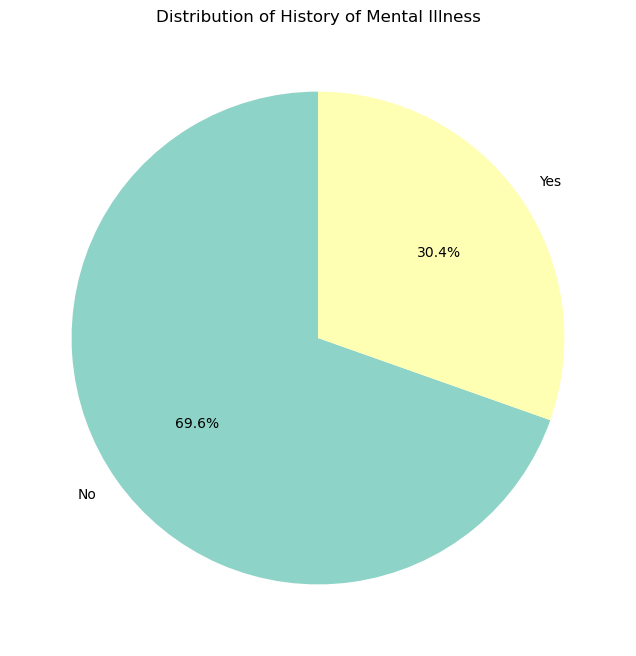

In [45]:
marital_counts = df['History of Mental Illness'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of History of Mental Illness')
plt.show()

# Substance Abuse

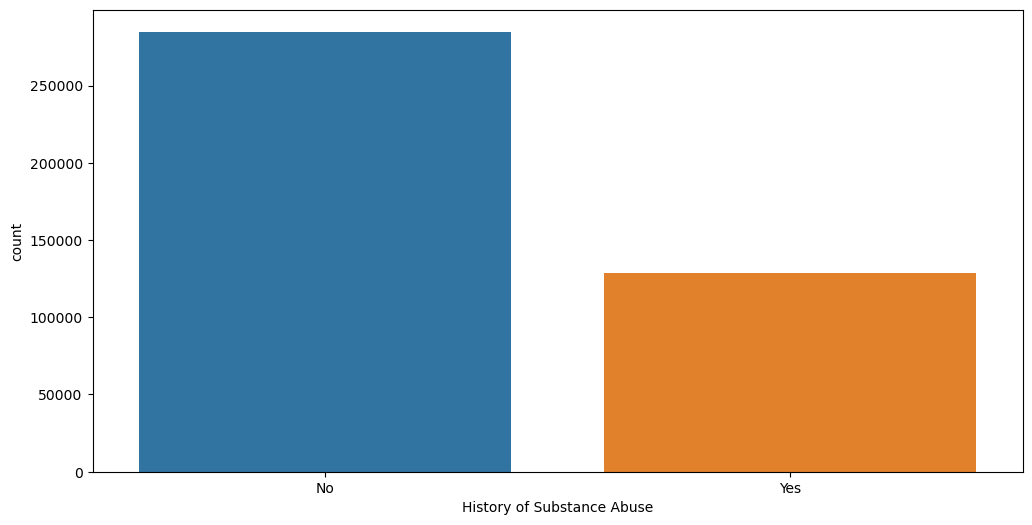

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='History of Substance Abuse', data=df, order=df['History of Substance Abuse'].value_counts().index)
plt.show()

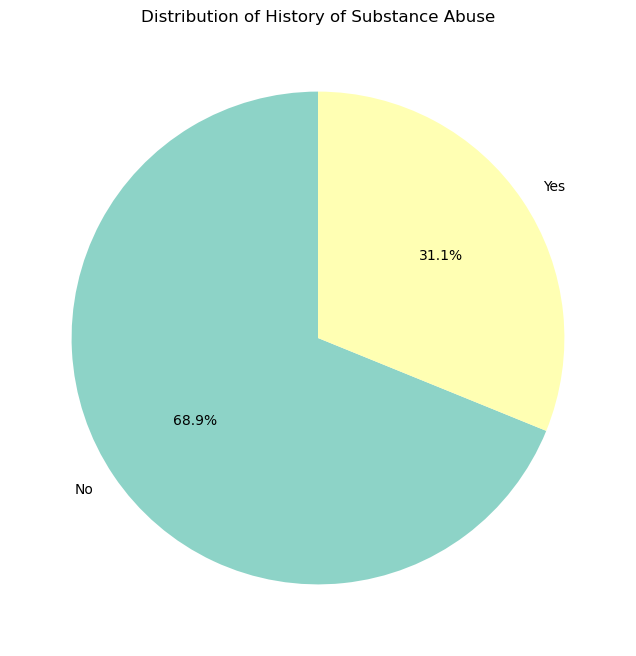

In [46]:
marital_counts = df['History of Substance Abuse'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of History of Substance Abuse')
plt.show()

# Depression

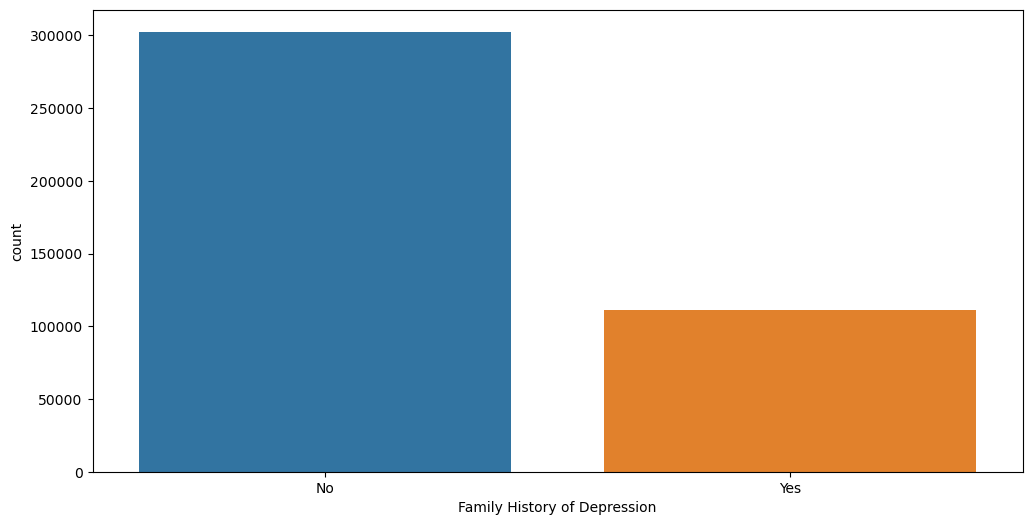

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Family History of Depression', data=df, order=df['Family History of Depression'].value_counts().index)
plt.show()

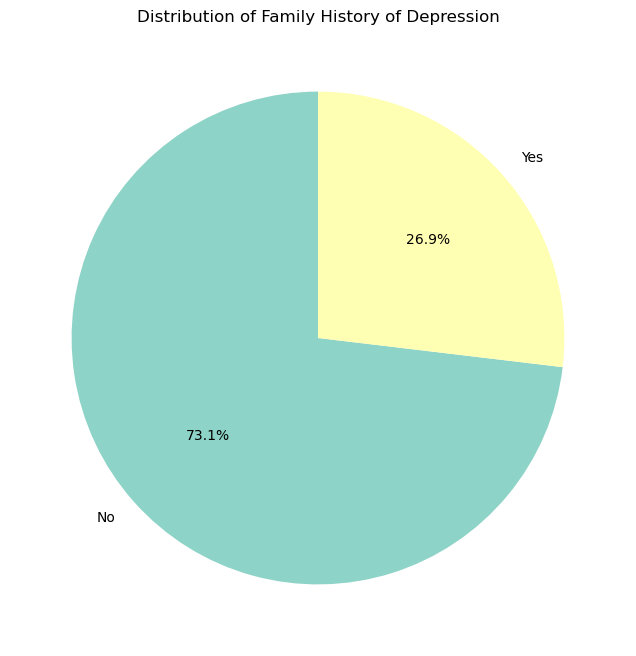

In [47]:
marital_counts = df['Family History of Depression'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Family History of Depression')
plt.show()

# Medic Conditions

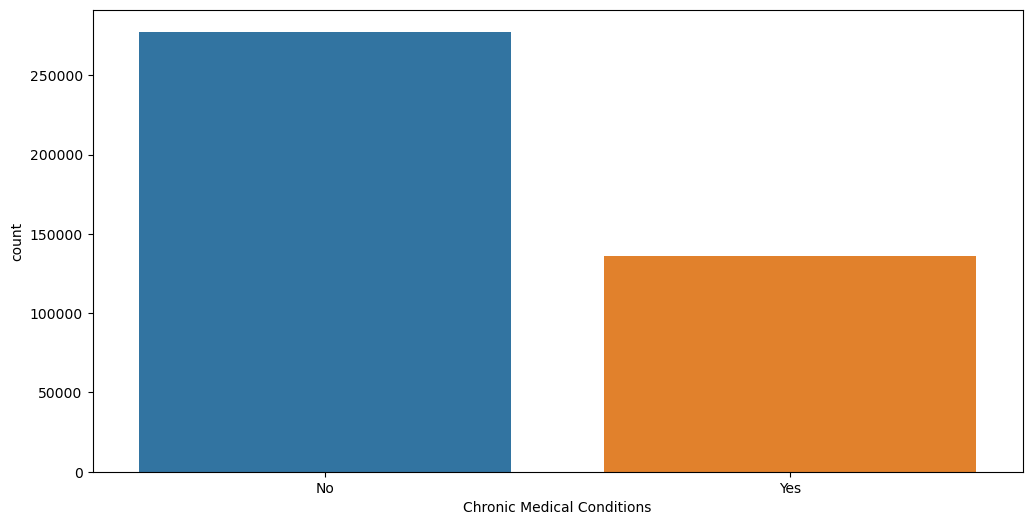

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Chronic Medical Conditions', data=df, order=df['Chronic Medical Conditions'].value_counts().index)
plt.show()

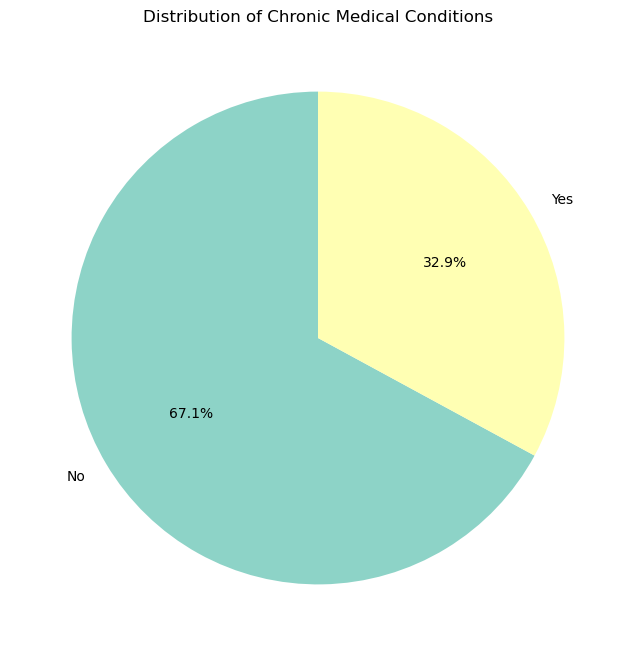

In [48]:
marital_counts = df['Chronic Medical Conditions'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(marital_counts)))
plt.title('Distribution of Chronic Medical Conditions')
plt.show()

# Columns of Interest (Based on Correlation Matrix in q2)

In [49]:
filtered_df = df[df['History of Mental Illness'] == 'Yes']

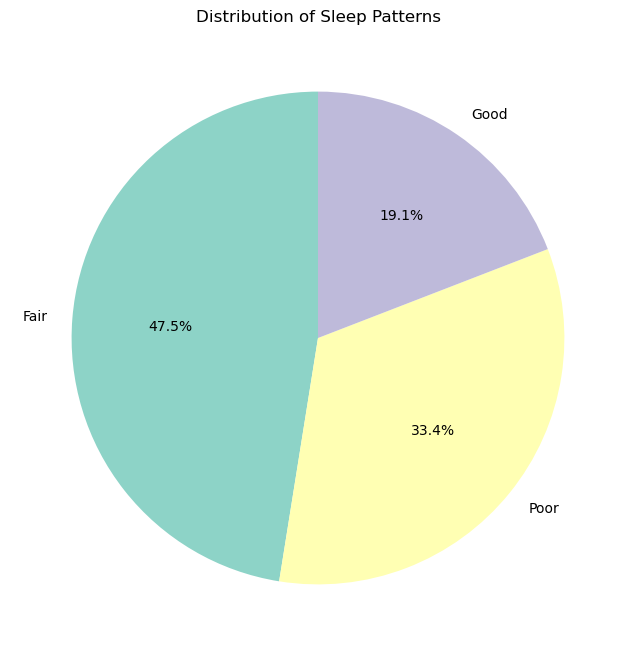

In [53]:
counts = filtered_df['Sleep Patterns'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(counts)))
plt.title('Distribution of Sleep Patterns')
plt.show()

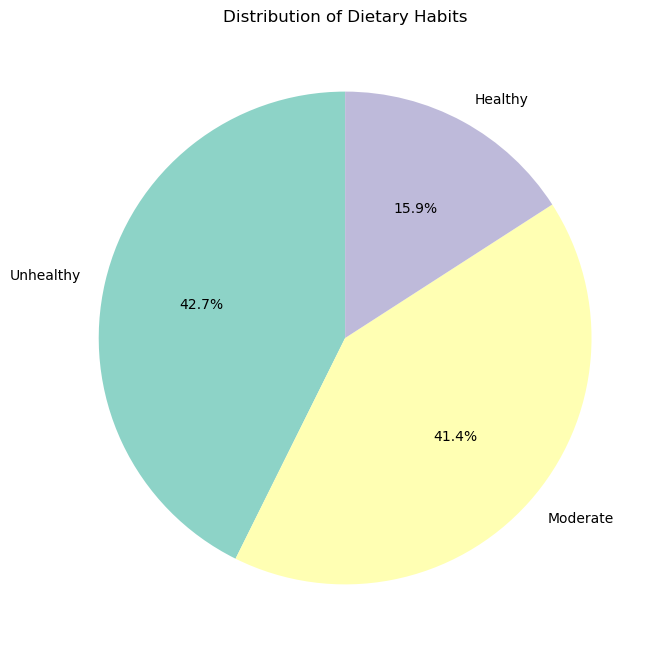

In [54]:
counts = filtered_df['Dietary Habits'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(counts)))
plt.title('Distribution of Dietary Habits')
plt.show()

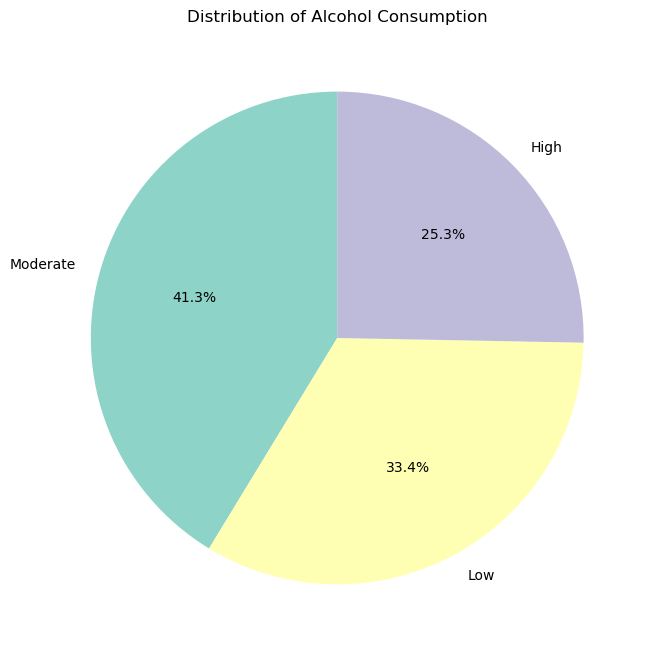

In [55]:
counts = filtered_df['Alcohol Consumption'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(counts)))
plt.title('Distribution of Alcohol Consumption')
plt.show()

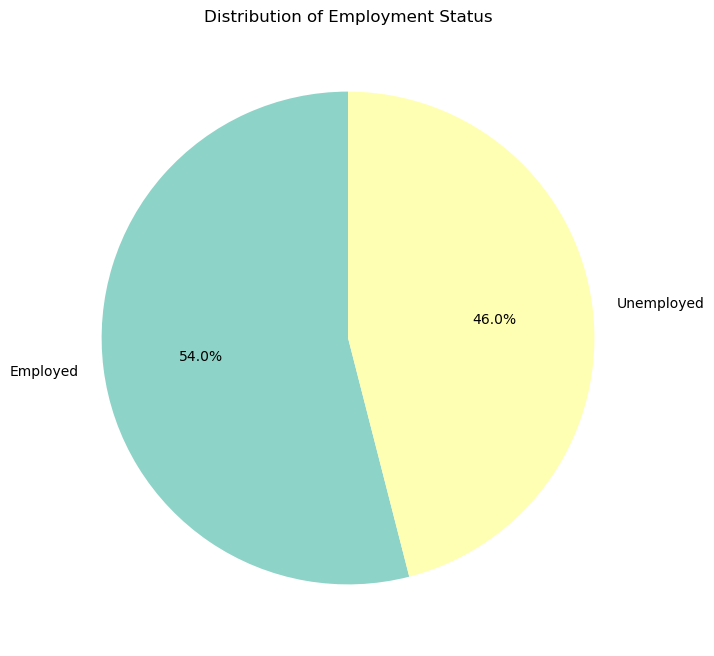

In [57]:
counts = filtered_df['Employment Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(counts)))
plt.title('Distribution of Employment Status')
plt.show()